# **Uvod**

**Student:** Neda Arsenijević

**Predmet:** Principi prezentacije i prepoznavanja oblika

**Tema:** Detekcija oblika (broda)

**Predmetni nastavnik**: Arsenović Marko

**Predmetni asistent:** Đorđević Sofija

Tema mog projekta u okviru predmeta *Principi prezentacije i prepznavanje oblika* jeste detekacija broda. Ova tema spada u oblast računarske obrade fotografija. Primarni objekat ovog projekta je brod - objekat koji se može naći u različitim dimenzijama ali i okolnostima. Na primer, brod se može naći na čistom mirnom plavom moru, ali i u sred oluje, kiše ili grmljavine. Samim tim, lošije okolnosti ga čine težim za prepoznavanje čak i golim okom.

Najvažnija stvar koja razdvaja detekciju od klasifikacije jeste odgovor na pitanje šta je ono što želimo da postignemo. Kada je u pitanju klasifikacija, dovoljno je znati odgovor na pitanje - Da li se na slici nalazi brod ili ne? Međutim, kod detekcije su stvari malo kompleksnije i proširene. Pored osnovnog pitanja, potrebno je identifikovati položaj objekta (broda), izdvojiti njegove konture i granice. Zbog toga bih rekla da je klasifikacija najjednostavniji vid detekcije.

Problem detekcije oblika broda ima primenu u različitim sferama. Kada su u pitanju brodovi, prva asoacijacija na praktičnu primenu jeste praćenje pomorskog saobraćaja, kontrola granica i bezbednosti. Ali, granice primene su dosta šire pa je samim tim detekcija broda potrebna u ekološkom monitoringu i zaštiti mora, kao i u vojnim i komercijalnim aplikacijama.
*****

#**Cilj**

Cilj mog rada je da prikažem postupak detekcije oblika broda na slikama iz datog seta podataka. Praktični deo podrazumeva korišćenje **Google Colab** okruženja i bilioteka za obradu slika, kako bi se sproveli svi potrebni koraci, od učitavanja seta podataka, pa do same detekcija broda.

Tokom izrade ovog projekta, nisam želela da ostane samo na tome da je na slikama detektovan brod, već i da izdvojim njegov oblik.Iz tog razloga pored detekcije, upustila sam se i u segmentaciju.
Segmentacija mi omogućava da precizno prikažem konture broda, što direktno odgovara temi detekcije oblika.

**Specifični ciljevi projekta su:**


*   Upoznavanje sa osnovama obrade slike i tehnikama koje se koriste za detekciju oblika,
*   Implementacija algoritma za izdvajanje i vizuelno prepoznavanje broda,
* Testiranje rada algoritma na različitim fotografijama i analiziranje rezultata
* sagledavanje praktične primene ovakvih metoda u realnim uslovima, kao što su bezbednost, saobraćaj i ekologija.
* Razumevanje načina na koji maska predstavlja oblik broda na slici,
* Kreiranje i priprema trening skupa podataka za izdvajanje oblika broda,
* Primena metode segmentacije u cilju dobijanja kontura broda.

Na ovaj način rad ima dvostruku svrhu – da pokaže kako teorijske metode obrade slike funkcionišu u praksi i da ukaže na značaj detekcije brodova u širem kontekstu.
*****


# **Teorijska osnova detekcije**

**Detekcija oblika** podrazumeva pronalaženje i izdvajanje elementa sa određene fotografije. Kao što je već napomenuto, algoritam pored odgovora na pitanje "Da li je to taj objekat?" treba da odredi položaj, oblike, dimenzije, konture.

Prema stručnoj literaturi koja mi je bila dostupna, detekcija brodova obuhvata tehnike i metode kojima se detektuju i lociraju brodovi najčešće pomoću satelitskih snimaka dobijenih metodom **radarskog daljinskog posmatranja**, uključujući **Synthetic Aperture Radar (SAR)**. Ova metoda omogućava široku i kontinuiranu pokrivenost okeana i mora, što je ključno za nadzor i sigurnost pomorskog saobraćaja. SAR tehnologija pruža mogućnost detekcije brodova preko velikih površina bez obzira na pozadinske okolnosti. Primena konkretno ove tehnologije prevazlizi granice suštinske primene detektovanja oblika. Pa se tako može iskoristiti u svrhe potrage, spasavanja ili praćenja ilegalnih aktivnosti.

U ovom projektu, nisu korišćeni sateltiski snimci, već fotografije iz dobijenog data seta.

Metode koje su razvijene u literaturi i praksi:


*   **Klasične metode obrade fotografija** - zasnivaju se ne pretprocesiranju (konverziji u sivu skalu, filtriranje šuma, binarizacija), detekcija ivica (Canny, Sobel) i pronalaženju kontura. Ove metode su jednostavne i efikasne u situacijama kada je objekat lako prepoznatljiv.
*   **Geometrijski pristupi** - koriste matematičke transformacije, poput Hough transformacije, za detekciju pravih linija i kružnica. Posebno su korisni kada objekat ima jasno definisane obrise.
*   **Momenti i invarijantne osobine** - omogućavaju poređenje oblika nezavisno od translacije, rotacije ili skaliranja. Na primer, Hu momenti se često koriste za prepoznavanje oblika broda bez obzira na njegov položaj na slici.
* **Savremeni pristupi zasnovani na DL (deep learning)** - koriste konvolutivne neuronske mreže i napredne modele poput YOLO ili Faster R-CNN. Ovi pristupi postižu visoku preciznost čak i u složenim uslovima, ali zahtevaju velike skupove podataka i značajne računarske resurse.
*****


# **Segmentacija, maska, U-Net**

**Segmentacija** slike predstavlja postupak kojim se svaki piksel na slici svrstava u određenu kategoriju. U okviru ovog rada cilj segmentacije je da se izdvoje pikseli koji pripadaju brodu, kako bi se dobio njegov tačan oblik. Za razliku od klasične detekcije, koja samo označi da objekat postoji na slici, segmentacija omogućava precizno izdvajanje kontura broda, što direktno odgovara temi detekcije oblika.

**Maska** je binarna slika istih dimenzija kao originalna fotografija. U njoj svaki piksel ima vrednost 0,1. Maska praktično predstavlja „šablon” kojim je označen tačan položaj i oblik broda. Tokom treniranja modela, maske služe kao ciljna vrednost prema kojoj mreža uči da prepozna konture broda.

**U-Net**
Za segmentaciju u ovom projektu korišćena je U-Net arhitektura, često primenjivana u zadacima gde je potrebno precizno izdvajanje objekta.
U-Net se sastoji iz dva dela:
*   Encoder – smanjuje dimenzije slike i izvlači najvažnije osobine,
*   Decoder – vraća dimenzije slike i rekonstruiše oblik objekta.

Posebnost U-Neta su skip konekcije, koje direktno povezuju odgovarajuće nivoe encodera i decodera, čime omogućavaju da se sačuvaju fini detalji i jasne konture broda.
Zbog toga je ova arhitektura pogodna za zadatak detekcije oblika broda.


***Napomena***: U ovom poglavlju želela sam kratko da približim pomenute pojmove kako bi teorijska osnova bila pogodna za dalju izradu projekta i kako ne bi izašla van okvira teme. Takođe, svi ovi pojmovi kasnije se detaljnije obrađuju.

#**Opis data seta**

DataSet koji je osnova za ovaj projekat, prvenstveno je postavljen na lični Google Drive odakle je dalje povezan.

Folderi u setu:


*   **train_v2** - Sadrži slike koje se koriste za treniranje modela.
*   **test_v2** - Sadrži slike namenjene testiranju modela. Osnovni cilj test skupa je da se proveri sposobnost modela da detektuje brodove na neviđenim slikama.
*  **train_ship_segmentations_v2.csv** — anotacioni fajl koji sadrži podatke za obuku. Ima dve kolone: ImageId (naziv slike) i EncodedPixels (RLE zapis maske broda).
*  **sample_submission_v2.csv** — primer kako treba da izgleda format fajla kao konačno rešenje zadatka; koristi se kao šablon za kreiranje predikcija.


 *****

# **Osnovne biblioteke**
**os** — rad sa folderima i fajlovima

**cv2 (OpenCV)** — glavna biblioteka za obradu slika

**matplotlib.pyplot** — prikaz slika i grafika

**pandas** — rad sa tabelama (ako bude potrebno)

**numpy** — rad sa matricama, ključan deo obrade slika

**skimage.io** — alternativno učitavanje slika



Sledeći importi odnose se na Keras/TensorFlow i koriste se za izgradnju, treniranje i evaluaciju U-Net modela za segmentaciju:


**ImageDataGenerator** - koristi se za augmentaciju slika, učitavanje podataka i normalizaciju.

**Model** - koristi se za kreiranje modela pomoću Keras funkcionalnog API-ja.

**Layers** - obuhvata sve slojeve potrebne za izgradnju U-Net arhitekture (Conv2D, MaxPooling, UpSampling, Concatenate…).

**ModelCheckpoint** - automatski čuva najbolju verziju modela tokom treniranja.

**CSVLogger** - beleži tok treniranja (loss, val_loss) u CSV fajl.

**EarlyStopping** - prekida treniranje kada model prestane da se poboljšava.

**Adam** - optimizator koji stabilno i adaptivno podešava korak učenja.

**BinaryCrossentropy** - funkcija gubitka za binarnu segmentaciju.



In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import skimage.io
from keras import models

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# **Učitavanje i priprema data seta**

Pre samog započinjanja projekta, bilo je neophodno pripremiti dataset za dalji rad. Dataset je dobijen u okviru platforme Microsoft Teams, ali je neophodno bilo učitati ga na lični Google Drive kako bi se lakše povezao sa okruženjem Google Colab.

Nakon toga, definisala sam putanje do trainig i test podataka kako bih se uverila da su to pravi podaci koji su potrebni.
U ovom prvom koraku, izvršene su neke osnovne radnje poput brojanja datoteka, a to mi je naravno služilo kao osnova za dalju analizu.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = "/content/drive/My Drive/PPO/train_v2"
test_path = "/content/drive/My Drive/PPO/testv2/test_v2"

print("Train folder postoji:", os.path.exists(train_path))
print("Test folder postoji:", os.path.exists(test_path))

if os.path.exists(train_path):
    print("Broj slika u train folderu:", len(os.listdir(train_path)))

if os.path.exists(test_path):
    print("Broj slika u test folderu:", len(os.listdir(test_path)))

# **Vizuelna provera slika iz test i trening skupa**

Nakon učitavanja i povezivanja sa Google Drive-om, naredni korak je vizuelna provera slika u test i trening folderima. Ovaj korak je odrađen kako bih se i vizuelno uverila da je sve povezano na pravi način.

Najpre, iz trening foldera učitana je lista svih slika i prikazala se prva od tih. Isti postupak je odrađen i za test folder.

Pošto OpenCV podrazumevano učitava slike u BGR formatu, izvršena je konverzija u RGB format radi pravilnog prikaza u matplotlib-u.


In [ ]:
# Uzimamo jednu sliku iz train foldera
train_files = os.listdir(train_path)

# Učitamo prvu sliku
img = cv2.imread(os.path.join(train_path, train_files[0]))

# Prikaz slike
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Primer slike iz train_v2")
plt.axis("off")
plt.show()

In [ ]:
# Lista fajlova iz test foldera
test_files = os.listdir(test_path)

# Učitamo prvu sliku iz test seta
img = cv2.imread(os.path.join(test_path, test_files[0]))

# Prikaz slike
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Primer slike iz test_v2")
plt.axis("off")
plt.show()


# **Učitavanje i pregled CSV fajla**

Pored slika, dataset sadrži i dve CSV datoteke koje prate informacije o brodovima. Prvi CSV fajl (train_ship_segmentations_v2.csv) sadrži anotacije za trening skup, odnosno podatke o tome koje slike sadrže brodove i kako izgledaju njihove maskirane konture. Drugi fajl (sample_submission_v2.csv) predstavlja primer formata rezultata koji se koristi pri evaluaciji modela.

Kako bi se ove informacije iskoristile u daljoj obradi, potrebno je učitati oba CSV fajla i izvršiti pregled njihovog sadržaja. U kodu se definišu putanje do fajlova, zatim se podaci učitavaju u pandas DataFrame strukture. Na kraju se ispisuju prvih nekoliko redova svakog fajla kako bi se vizuelno proverilo da li su podaci pravilno učitani i kako izgleda njihova struktura.

In [ ]:

# Putanje do CSV fajlova
csv_train = "/content/drive/My Drive/PPO/train_ship_segmentations_v2.csv"
csv_submission = "/content/drive/My Drive/PPO/sample_submission_v2.csv"

# Učitavanje CSV fajlova
df_train = pd.read_csv(csv_train)
df_submission = pd.read_csv(csv_submission)

# Prvih 5 redova iz train fajla
print("Train CSV:")
print(df_train.head(), "\n")

# Prvih 5 redova iz sample_submission fajla
print("Sample submission CSV:")
print(df_submission.head())


Kako ne bih nailazila na greške prilikom učitavanja i pokretanja ćelija, odrađen je jedan vid čišćenja podataka.

Nakon učitavanja CSV fajla, proveredno je da li se sve slike iz tabele zaista nalaze u trening folderu na disku. U originalnom datasetu (koji je po mojoj pretpostavic preuzet sa sajta Kaggle), postoji određen broj zapisa čiji se fajlovi ne nalaze u potrebnom folderu.

Zbog toga se vrši filtriranje tako što se zadržavaju samo oni redovi iz CSV-a za koje odgovarajuća slika stvarno postoji u trening direktorijumu. Na taj način obezbeđuje se da model tokom treniranja dobija isključivo validne parove (slika–maska), čime se izbegavaju greške i obezbeđuje stabilno pokretanje generatora i celog procesa treniranja.

In [ ]:
# Uklanjanje redova čije slike NE postoje u train folderu
df_train = df_train[df_train['ImageId'].apply(
    lambda x: os.path.exists(os.path.join(train_path, x))
)]

print("Broj validnih slika:", len(df_train))

Napravila sam kopiju tabele df_train kako bi se maske obradjivale odvojeno i kako ne bi narušile originalne podatke.

In [ ]:
masks = df_train.copy()

# **Pronalaženje prve slike sa maskom**

Pošto u CSV fajlu nisu sve slike imale masku (one bez brodova imale su NaN u koloni EncodedPixels), prvo sam želela da pronađem bar jednu sliku na kojoj se brod stvarno nalazi.

Zato sam filtrirala DataFrame tako da zadržim samo redove gde EncodedPixels nije bio prazan. Na taj način ostale su mi samo slike koje su imale masku.

Iz tog skupa sam zatim uzela prvi primer, koji mi je poslužio za vizuelizaciju maske i testiranje dekodiranja RLE formata.

In [ ]:
example = df_train[df_train['EncodedPixels'].notnull()].iloc[0]
print(example)

# **Dekodiranje RLE maske i prikaz segmentacije na slici**

U izvornom CSV fajlu maske brodova su zapisane u RLE formatu, iz tog razloga potrebno je da se dekodiraju kako bi se dobila binarna maska koja označava položaj broda na slici.

Funkcija ***rle_decode*** pretvara RLE niz u binarnu masku dimenzija 768×768, gde su pikseli broda označeni vrednošću 1, a pozadina vrednošću 0.

Funkcija ***rle_encode*** je suprotna operacija, pretvara biranu masku u RLE niz. Ova funkcija se koristi ukoliko se maska naknadno kreira ili menja pa je potrebno ponovo zapisati u rle formatu.

U ovom delu koda, učitala sam izvornu sliku iz trening skupa, a preko nje se prikazuje maska, vizuelno drugačije.

Ovo je odrađeno kako bih vizuelno bila sigurna da maska označava brod na slici i kako bih se uverila da je uzeta ispravna slika iz seta.

In [ ]:
# RLE encode/decode funkcije

def rle_encode(img):
    """
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formatted
    """
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)


def rle_decode(mask_rle, shape=(768, 768)):
    """
    mask_rle: RLE kodirana maska (string)
    shape: (height, width) dimenzije slike
    Returns: numpy maska (1 = brod, 0 = pozadina)
    """
    if type(mask_rle) != str:  # Ako je NaN (nema broda)
        return np.zeros(shape, dtype=np.uint8)

    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths

    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1

    return img.reshape(shape).T


In [ ]:
# Primer slike iz CSV fajla
test_img_id = '000155de5.jpg'
test_mask = df_train.loc[df_train['ImageId'] == test_img_id]['EncodedPixels']

# Dekodiranje prve maske
decode = rle_decode(test_mask.iloc[0])

# Učitavanje slike
test_img = skimage.io.imread(os.path.join(train_path, test_img_id))

# Prikaz slike + maske
plt.figure(figsize=(6, 6))
plt.imshow(test_img)
plt.imshow(decode, alpha=0.4, cmap="Reds")  # maska preko slike
plt.title(f"Slika i maska za {test_img_id}")
plt.axis("off")
plt.show()

U ovom koraku uzeta su 3 primera iz CSV fajla koji sigurno imaju masku. Suštinski je isti kao prethodni korak, samo je odrađen na primeru od tri slike.

Filtrirala sam redove kod kojih  kolona ***EncodedPixels*** nije prazna, prošla kroz sva tri reda jedan po jedan, iz svakog preuzela ID slike i pripadajuči RLE zapis maske.

Za svaki od tri primera učitala sam originalnu sliku sa diska i dekodiram masku pomoću funkcije rle_decode.

In [ ]:
# Uzmemo 3 primera iz CSV-a gde ima brodova (EncodedPixels nije NaN)
examples = df_train[df_train['EncodedPixels'].notnull()].iloc[:3]

plt.figure(figsize=(15, 5))

for i, row in enumerate(examples.itertuples(), 1):
    img_id = row.ImageId
    mask_rle = row.EncodedPixels

    # Učitavanje slike
    img = skimage.io.imread(os.path.join(train_path, img_id))

    # Dekodiranje maske
    mask = rle_decode(mask_rle)

    # Prikaz slike + maske
    plt.subplot(1, 3, i)
    plt.imshow(img)
    plt.imshow(mask, alpha=0.4, cmap="Reds")
    plt.title(img_id)
    plt.axis("off")

plt.show()


Ovaj korak je identičan kao i prethodna dva.

Razlika je u tome što sam ovde prikazala devet slika (sa maskom) koje imaju brodove u mreži 3x3.

In [ ]:
# Uzmemo 9 primera iz CSV-a gde ima brodova (EncodedPixels nije NaN)
examples = df_train[df_train['EncodedPixels'].notnull()].iloc[:9]

plt.figure(figsize=(15, 15))

for i, row in enumerate(examples.itertuples(), 1):
    img_id = row.ImageId
    mask_rle = row.EncodedPixels

    # Učitavanje slike
    img = skimage.io.imread(os.path.join(train_path, img_id))

    # Dekodiranje maske
    mask = rle_decode(mask_rle)

    # Prikaz slike + maske
    plt.subplot(3, 3, i)   # 3 reda × 3 kolone = 9 slika
    plt.imshow(img)
    plt.imshow(mask, alpha=0.4, cmap="Reds")
    plt.title(img_id, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


U setu podataka postoje i slike koje imaju više od jedne maske. To znači da takva slika ima više redova u CSV fajlu koji je dostupan, naravno, bitno je napomenuti da svaki red sadrži RLE masku za tačno jedan pojedinačni brod.

U narednoj ćeliji, prikazana je baš takva slika.

Proces prikazivanja izgleda tako što se prvo izdvaja slika čiji se ImageID pojavljuje više puta (grupisanje po nazivu slike i filtriranje onih gruap koje imaju više od jednog reda). Nredni korak je učitavanje svih redova za tu sliku, tj. svih RLE maski, i nakon toga učitavanje same slike.

Kao i u prethodnim primerima, za vizualizaciju, izvorna slika se prikazuje kao pozadina a svaka pojedinačna maska se dekodira putem funkcije ***rle_decode*** i postavlja preko broda uz blagu transparentnost.

In [ ]:
# Nađemo jednu sliku koja ima više maski (više redova u CSV-u)
multi_example = df_train[df_train['EncodedPixels'].notnull()].groupby('ImageId').filter(lambda x: len(x) > 1).iloc[0]
img_id = multi_example['ImageId']

# Učitamo sve redove za tu sliku
masks_for_image = df_train[df_train['ImageId'] == img_id]['EncodedPixels']

# Učitavanje slike
img = skimage.io.imread(os.path.join(train_path, img_id))

# Prikaz slike
plt.figure(figsize=(6,6))
plt.imshow(img)

# Dodavanje svih maski preko slike
for mask_rle in masks_for_image:
    mask = rle_decode(mask_rle)
    plt.imshow(mask, alpha=0.4, cmap="Reds")

plt.title(f"Slika sa više brodova: {img_id}")
plt.axis("off")
plt.show()


# **Generator podataka za treniranje modela**

Za potrebe treniranja modela detekcije oblika broda, neophodno je koristit generator podataka koji će mreži isporučivati slike i odgovarajuće maske u pravilnom formatu. Polazni dataset sadrži preko 45000 slika visoke rezolucije, učitavanje celog skupa nije najoptimalniji način, pa sam iz tog razloga koristila generator koji podatke učitava samo kada je to potrebno.

Funkcija ***image_gen*** je napravljena tako da tokom treniranja modela automatski priprema ulazne podatke. U svakoj iteraciji generator preuzima naziv slike i odgovarajući RLE zapis maske, zatim učitava originalnu sliku iz trening skupa i dekodira masku pomoću funkcije rle_decode.
Nakon dekodiranja, maska je u formatu 768x768x1. Ovo je neophodno zbog neuronskih mreža. One očekuju da ulaz i izlaz imaju i dodatnu dimenziju koja predstavlja kanal, u ovom slučaju je to broj 1.
Kod maski taj kanal predstavlja samo jednu informaciju — da li je piksel brod (1) ili pozadina (0). Zato maska mora da ima treću dimenziju sa vrednošću 1, kako bi model mogao ispravno da je obradi tokom treniranja.

Generator vraća par (matematički rečeno torku (a,b) = (slika, maska))). Upravo taj par je ono što model koristi prilikom učenja - slika kao ulaz, maska kao izlaz.

U ćeliju koda ispod, dodala sam opciju *show = true* kako bi generator vizuelno prikazao sve ovo što je već objašnjeno. Ovo je jedan od boljih način kako bi se proverilo da li je ispravan par u pitanju.

Ovakav način pripreme podataka omogućava da se slike i maske učitavaju postepeno, po potrebi, umesto da se cela kolekcija učitava odjednom. To znatno smanjuje potrošnju memorije i čini proces treniranja modela bržim, stabilnijim i efikasnijim.

In [ ]:
def image_gen(df, show=True):
    """
    df: DataFrame koji sadrži ImageId i EncodedPixels
    show: ako je True, prikazuje sliku i masku tokom generisanja
    yield: vraća jednu sliku i njenu masku (X, y)
    """

    images = list(df['ImageId'])
    masks = list(df['EncodedPixels'])

    i = 0
    while i < len(images):
        img_path = os.path.join(train_path, images[i])   # ispravno za tvoj projekat
        img = skimage.io.imread(img_path)

        # dekodiranje maske
        mask = rle_decode(masks[i])
        mask = np.reshape(mask, (768, 768, 1)).astype('float32')

        # normalizacija slike
        img = img.astype('float32') / 255.0

        # prikaz ako je show=True
        if show:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.imshow(mask.squeeze(), alpha=0.4, cmap="Reds")
            plt.title(images[i])
            plt.axis("off")
            plt.show()

        # vraćanje jedne slike i jedne maske
        yield (np.array([img]), np.array([mask]))

        i += 1


In [ ]:
gen = image_gen(df_train, show=True)
next(gen)

Kao što je već rečeno, jedna slika može imati više brodova, samim tim više maski, odnosno više RLE zapisa. Kako bih spremila podatke za treniranje, sve maske koje pripadaju istoj slici spojila sam u jednu.

ve maske su spojene u jednu binarnu masku dimenzija 768×768, tako da su svi brodovi obuhvaćeni. Nakon spajanja, maska je ponovo enkodirana u RLE format i upisana kao jedini zapis za tu sliku.

Na kraju je tabela vraćena u standardni oblik, tako da svaka slika ima tačno jednu masku, što je neophodno za treniranje modela.

In [ ]:
from tqdm import tqdm

# 1. Koliko maski ima svaka slika
masks['count'] = masks.groupby('ImageId')['EncodedPixels'].transform('count')

# 2. Koristimo ImageId kao indeks
masks.set_index('ImageId', inplace=True)

# 3. Slike sa jednom maskom i slike bez maski (<=1)
mu = masks[masks['count'] <= 1]

# 4. Slike sa više maski (>1)
mm = masks[masks['count'] > 1]

# 5. Spajanje maski za svaku sliku koja ima više brodova
for img_id in tqdm(mm.index.unique()):
    combined = np.zeros((768, 768))
    dfm = mm.loc[img_id, :]

    # ako postoji više redova, dfm je DataFrame
    # ako postoji samo jedan (retko), dfm je Series → pretvaramo u DataFrame
    if isinstance(dfm, pd.Series):
        dfm = dfm.to_frame().T

    for _, row in dfm.iterrows():
        d = rle_decode(row['EncodedPixels'])
        combined = np.maximum(combined, d)

    # kreira se jedan novi red sa spojenom maskom
    new_row = dfm.iloc[0].copy()
    new_row['EncodedPixels'] = rle_encode(combined)

    mu = pd.concat([mu, new_row.to_frame().T])

Ovim kodom DataFrame vraćam u standardni oblik, Time se ImageId ponovo pretvara u regularnu kolonu.

In [ ]:
mu.reset_index(inplace = True)

Ovaj deo koda izgleda kao da se kreira nekoliko novih DataFrame-ova (m01, m02, m03, itd.) koji sadrže određeni broj redova iz DataFrame-a mu na osnovu kriterijuma broja maski ('count').

In [ ]:

m01 = mu[mu['count'] == 0].iloc[0,:]
m02 = mu[mu['count'] == 0].iloc[1,:]
m03 = mu[mu['count'] == 0].iloc[2,:]

m11 = mu[mu['count'] == 1].iloc[0,:]
m12 = mu[mu['count'] == 1].iloc[1,:]
m13 = mu[mu['count'] == 1].iloc[2,:]

m21 = mu[mu['count'] == 2].iloc[0,:]
m22 = mu[mu['count'] == 2].iloc[1,:]
m23 = mu[mu['count'] == 2].iloc[2,:]

m31 = mu[mu['count'] == 3].iloc[0,:]
m32 = mu[mu['count'] == 3].iloc[1,:]
m33 = mu[mu['count'] == 3].iloc[2,:]

m41 = mu[mu['count'] == 4].iloc[0,:]
m42 = mu[mu['count'] == 4].iloc[1,:]
m43 = mu[mu['count'] == 4].iloc[2,:]

m51 = mu[mu['count'] == 5].iloc[0,:]
m52 = mu[mu['count'] == 5].iloc[1,:]
m53 = mu[mu['count'] == 5].iloc[2,:]


In [ ]:
m01_img = skimage.io.imread(train_path + "/" + m01["index"])
m02_img = skimage.io.imread(train_path + "/" + m02["index"])
m03_img = skimage.io.imread(train_path + "/" + m03["index"])

m11_img = skimage.io.imread(train_path + "/" + m11["index"])
m12_img = skimage.io.imread(train_path + "/" + m12["index"])
m13_img = skimage.io.imread(train_path + "/" + m13["index"])

m21_img = skimage.io.imread(train_path + "/" + m21["index"])
m22_img = skimage.io.imread(train_path + "/" + m22["index"])
m23_img = skimage.io.imread(train_path + "/" + m23["index"])

m31_img = skimage.io.imread(train_path + "/" + m31["index"])
m32_img = skimage.io.imread(train_path + "/" + m32["index"])
m33_img = skimage.io.imread(train_path + "/" + m33["index"])

m41_img = skimage.io.imread(train_path + "/" + m41["index"])
m42_img = skimage.io.imread(train_path + "/" + m42["index"])
m43_img = skimage.io.imread(train_path + "/" + m43["index"])

m51_img = skimage.io.imread(train_path + "/" + m51["index"])
m52_img = skimage.io.imread(train_path + "/" + m52["index"])
m53_img = skimage.io.imread(train_path + "/" + m53["index"])


Ovim korakom definisala sam veličinu svih slika u daljem toku projekt (iz biblioteke matplotlib.pyplot). Konkretno, sve dalje će biti 20x20.

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)


Ovim korakom napravila sam prikaz 18 slikan 6 redova i 3 kolone.
Za svaku sliku prvo se prikazuje original, a zatim se preko nje transparentno prikazuje maska broda.

Na ovaj način jasno se vidi da li maska odgovara stvarnom objektu na slici i kako izgleda raspored brodova u različitim primerima.


In [ ]:
from skimage.util import montage

fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9),
      (ax10, ax11, ax12),
      (ax13, ax14, ax15),
      (ax16, ax17, ax18)) = plt.subplots(6,3)
plt.tight_layout()

ax1.imshow(m01_img)
ax1.imshow(rle_decode(m01['EncodedPixels']), alpha = 0.5)
ax2.imshow(m02_img)
ax2.imshow(rle_decode(m02['EncodedPixels']), alpha = 0.5)
ax3.imshow(m03_img)
ax3.imshow(rle_decode(m03['EncodedPixels']), alpha = 0.5)

ax4.imshow(m11_img)
ax4.imshow(rle_decode(m11['EncodedPixels']), alpha = 0.5)
ax5.imshow(m12_img)
ax5.imshow(rle_decode(m12['EncodedPixels']), alpha = 0.5)
ax6.imshow(m13_img)
ax6.imshow(rle_decode(m13['EncodedPixels']), alpha = 0.5)

ax7.imshow(m21_img)
ax7.imshow(rle_decode(m21['EncodedPixels']), alpha = 0.5)
ax8.imshow(m22_img)
ax8.imshow(rle_decode(m22['EncodedPixels']), alpha = 0.5)
ax9.imshow(m23_img)
ax9.imshow(rle_decode(m23['EncodedPixels']), alpha = 0.5)

ax10.imshow(m31_img)
ax10.imshow(rle_decode(m31['EncodedPixels']), alpha = 0.5)
ax11.imshow(m32_img)
ax11.imshow(rle_decode(m32['EncodedPixels']), alpha = 0.5)
ax12.imshow(m33_img)
ax12.imshow(rle_decode(m33['EncodedPixels']), alpha = 0.5)

ax13.imshow(m41_img)
ax13.imshow(rle_decode(m41['EncodedPixels']), alpha = 0.5)
ax14.imshow(m42_img)
ax14.imshow(rle_decode(m42['EncodedPixels']), alpha = 0.5)
ax15.imshow(m43_img)
ax15.imshow(rle_decode(m43['EncodedPixels']), alpha = 0.5)

ax16.imshow(m51_img)
ax16.imshow(rle_decode(m51['EncodedPixels']), alpha = 0.5)
ax17.imshow(m52_img)
ax17.imshow(rle_decode(m52['EncodedPixels']), alpha = 0.5)
ax18.imshow(m53_img)
ax18.imshow(rle_decode(m53['EncodedPixels']), alpha = 0.5)

U ovom delu je klasična podela podataka na test i trening. Odradjena je razmera 80% podataka za treniranje i 20% za testiranje.
Zatim sam vizuelno prikazala raspodelu broja maski u trening skupu i izdvojila manji uzorak podataka za dalju analizu.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Podela na tren i test
df_train, df_test = train_test_split(mu, test_size=0.2, shuffle=True)

# 2. Histogram broja maski u trening skupu
df_train['count'].hist()

# 3. Frekvencija za svaki count
df_train['freq'] = df_train.groupby('count')['count'].transform('count')

# 4. Sample koji uzima sve podatke (koliko imaš)
df_sample = df_train.sample(
    n=len(df_train),
    weights = 1 / (df_train['freq'].pow(1.5)),
    replace=True
)

# 5. Histogram nakon sampleovanja
df_sample['count'].hist(bins=20)


Ovaj blok koda se koristi za generisanje trening i test skupova podataka za treniranje i testiranje modela za segmentaciju objekata na slikama

In [ ]:
df_sample.rename(columns={"index": "ImageId"}, inplace=True)
df_test.rename(columns={"index": "ImageId"}, inplace=True)

train_gen = image_gen(df_sample)
X_train, y_train = next(train_gen)
print(np.shape(X_train), np.shape(y_train))

test_gen = image_gen(df_test)
X_test, y_test = next(test_gen)


# **Augmentacija slika**
Sledeći korak je primena augemntacije slike.

U pitanju je tehnika koja na veštački način proširi trenutni skup podataka, to radi tako što pravi nove izmenjene verzije slika.

**Kada se koristi?** Koristimo kada je trenutni skup jako mali ili kada želimo da sprečimo overfitting, takođe i kada želimo da postignemo stabilniji model.

**Šta je overfittinh?** To je pojava koja označava da je model previše napamet naučio podatke, više ih ne generalizuje. Tačnije, savršeno radi na postojećim trening podacima, ali čim se učitaju novi podaci, ne radi kako treba.

**Neki od primera augmentacije kroz slike:**
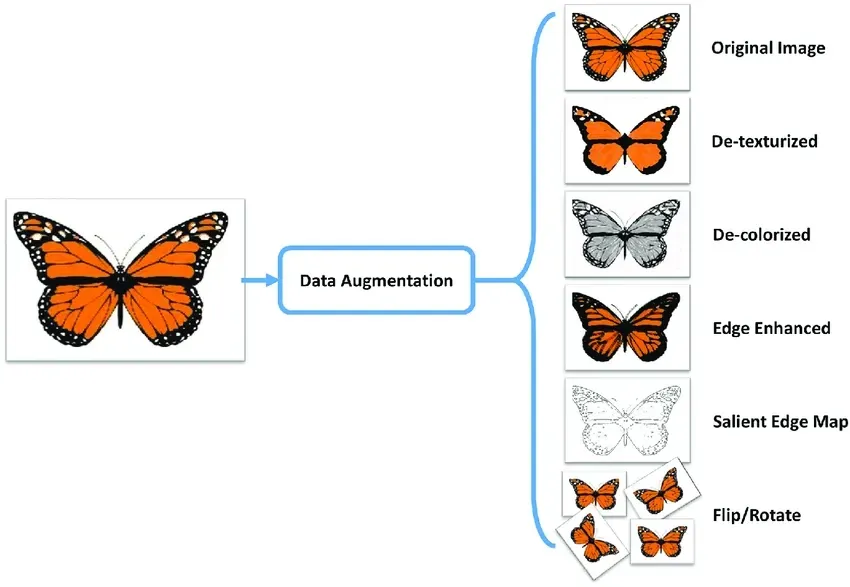

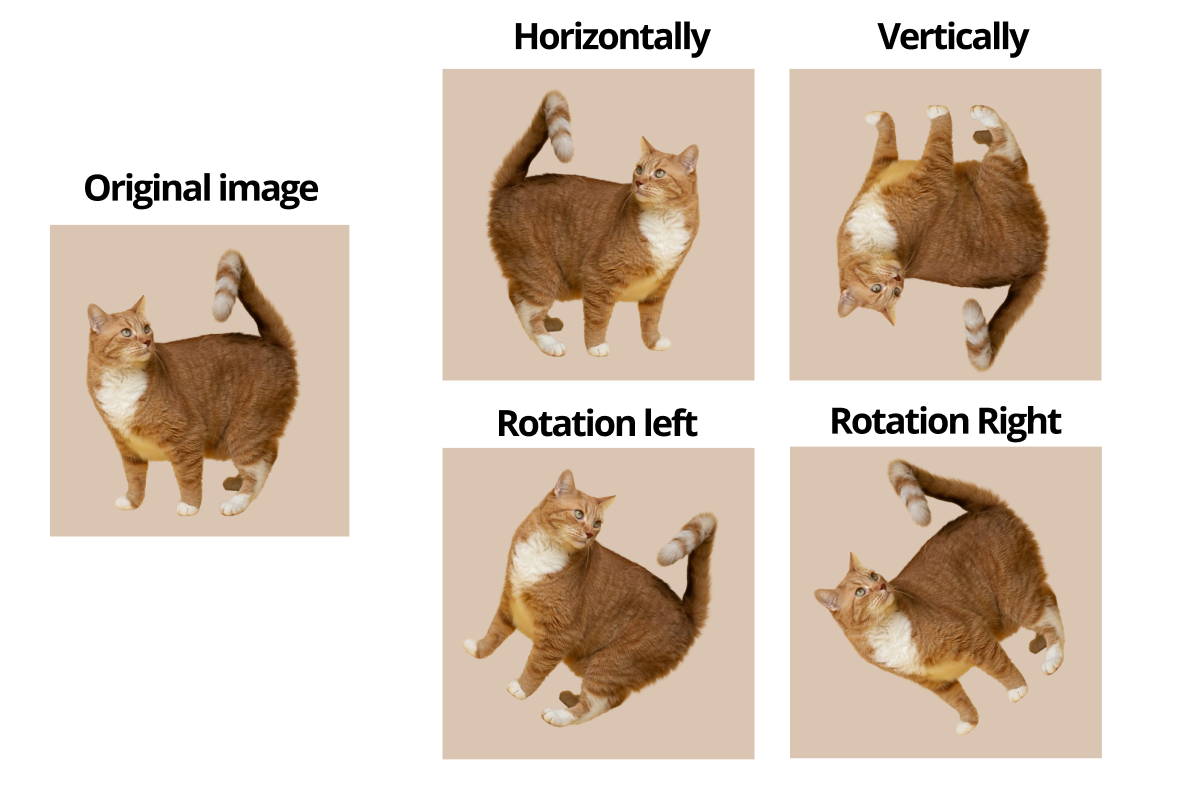


Kao što je prikazano, neki od najčešćih vidova augmentacije su:
1.   Geometrijska transformacija
2.   Transformacija prostora boja
3.   Kernel filteri
4.   Slučajno brisanje
5.   Mešanje slika

**Zašto je augemntacija važna za ovaj dataset?**
Dataset ima ograničen broj slika, objekti na tim slikama, u ovom slučaju brod, često mogu biti veoma malih dimenzija, različitih pozicija, u različitim okolnostima (na primer svtlosnim ili vremenskim što se drugačije reprezentuje na slikama).
Augemntacija pomaže da model "vidi" brod u svakakvim okolnostima i ono najvažnije da **ne nauči primere napamet**.

**Najkorinsije transformacije za brodove:**
Generalno gledano, nevezeno za projekat, ono što bi bilo najkorsinije za brod:
1.   horizontal flip
2.   vetical flip
3.   zoom_range
4.   brigthness range
5.   rotation range

**Šta augmentacija ne treba da radi?**
Treba izbegavati transformacije koje bi veštački skroz izobličile oblik i izgled broda ili potpuno promenile njegovu strukturu.
Na primer ekstremne rotacije za 90 ili 180 stepeni, drastično menjanje boja (maske nisu RGB!)...

**Kako augmentacija može narušiti rad modela?**
U-Net koristi skip konekcije i radi na piksel nivou.
Ako je augmntacija loše urađena, moguće je se slika i maska razdvoje. Iz tog razloga, kod segementacije, važno je da se augmentacija primeni i na sliku i na masku.

**Kako augmentacija sprečava overfitting u ovom projektu?**
Obzirom da je tema projekta detekcija objekta broda, set podataka je takav da slike sadrže neke klasične, poznate primere (pozadina je more i talasi). Takve, ponavljajuće stvari, dovode do toga da model nauči napamet pozadinu broda. Primenom augementacije, ona se totalno menja što dovodi do "novih" podataka.

---------------------------------------------------------------------
Blok koda koji se nalazi u ćeliji ispod odnosi se na parametre koje ću primeniti za augmentaciju slika u daljem toku projekta, tj. za treniranje modela.

Na početku samog projekta uvezla sam klasu **ImageDataGenerator**.

*dg_args* blok sadrži parametre potrebne za augmentaciju. U pitanju je Python rečnik koji se kasnije prosleđuje pomenutoj klasi **ImageDataGenerator**.

Svaki od parametara predstavlja jednu od transformacije slika:

***rotation range*** - blaga rotacije slike levo ili desno

***width shift range*** - pomeranje slike horizontalno za određeni procenat. Odnsono ukoliko je 0.1 to znači do 10% širine.

***height shift range*** - isti princip kao kod prethodnog parametra samo vertikalno.

***shear range*** - minimalno uvijanje slike

***zoom range*** - zumiranje slike od blagog smanjenja do uvećanja

***horizontal flip i vertical flip*** - okretanje slike horizontalno i vertikalno

***brightness range*** - promena osvetljenja

***fill mode*** - prazni pikseli se popunjavacju refleksijom ivice

In [ ]:
dg_args = dict(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='reflect'
)


Kod u ćeliji ispod kreira dva odvojena generatora, jedan za slike, jedan za maske.

Oba generatora koriste iste parametre augmentacije, što je definisano u ćeliji iznad.

Ali, ono što je važno jeste da se za maske mora ukloniti parametar koji je vezan za osvetljenje. **Promena osvetljenja ne sme da se primenjuje na maske!** Zato što maske moraju da zadrže svoje binarne vrednosti 0 i 1.

In [ ]:

im_gen = ImageDataGenerator(**dg_args)

dg_args.pop('brightness_range')
mask_gen = ImageDataGenerator(**dg_args)

Definisala sam funkciju *aug_gen* koja prvenstveno služi da se augementacija primeni na svaku sliku i svaku masku iz seta.

Za svaku iteraciju prvo se pravi jedan random seed, kako bi slika i maska bile transformisane na isti način.

Nakon toga se preko img_gen i mask_gen dobija uvećana verzija slike i odgovarajuće maske.

Na kraju, kao rezultat dobijaju se augmentirani podaci spremni za vizualizaciju i treniranje.

In [ ]:
def aug_gen(gen):
    for img, mask in gen:
        seed = np.random.randint(9999)  # isti seed = iste transformacije
        img_aug = im_gen.flow(img, batch_size=1, seed=seed).__next__()
        mask_aug = mask_gen.flow(mask, batch_size=1, seed=seed).__next__()
        yield img_aug, mask_aug

Ovde sam najpre pozvala prethodno definisanu funkciju aug_gen.
Rezultat je generator (test_aug) koji svaki put vraća novu, transformisanu verziju iste slike.

Zatim se postavlja figura sa četiri prikaza, i u svakom subplotu se prikazuje jedna augmentirana slika zajedno sa njenom maskom. Na taj način se vizuelno proverava da li augmentacija radi ispravno i da li slika i maska ostaju poravnate posle transformacija.

Tokom testiranja, primetila sam da prve dve slike budu "prazne", dok se ostale prikazuju normalno.

Uz malo istraživanja po internetu, shvatila sam da je to problem zbog Matplotlib biblioteke. U pitanju je posledica načina na koji Matplotlib upravlja prikazima kada se slike crtaju u više celija zaredom.

Pošto osnovni generator (image_gen) u ranijim koracima prikazuje slike zbog parametra show=True, Matplotlib pamti te figure i ostavlja otvoreno grafičko stanje. Kada se kasnije kreira figura sa četiri podgrafika, prva dva mesta ostanu prazna zbog prethodnih prikaza, dok se u preostala dva panela pravilno prikazuju augmentirane slike i maske.

Ova pojava ne utiče na tačnost i ispravnost augmentacije, već predstavlja ograničenje vizuelizacije u okruženjima kao što su Google Colab, a verovatno i JupyterNotebook.

U stvarnom treniranju modela augmentacija funkcioniše korektno

In [ ]:
test_aug = aug_gen(image_gen(df_sample[df_sample['count'] > 2]))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
plt.tight_layout()

tax1, tay1 = next(test_aug)
ax1.imshow(tax1[0])
ax1.imshow(np.reshape(tay1[0], (768,768)), alpha = 0.5)

tax2, tay2 = next(test_aug)
ax2.imshow(tax2[0])
ax2.imshow(np.reshape(tay2[0], (768,768)), alpha = 0.5)

tax3, tay3 = next(test_aug)
ax3.imshow(tax3[0])
ax3.imshow(np.reshape(tay3[0], (768,768)), alpha = 0.5)

tax4, tay4 = next(test_aug)
ax4.imshow(tax4[0])
ax4.imshow(np.reshape(tay4[0], (768,768)), alpha = 0.5)

Ova funkcija se u fazi kreiranja modela definiše kao dodatna metrika.
Njen značaj je da izračuna koliko pozitivnih piksela, tačnije piksela koji pripadaju brodu, model tačno predvidi u odnosu na ukupan broj pozitivnih piksela u maski.
Na taj način meri koliko je model uspešan u prepoznavanju stvarnih objekata, a ne samo u pogađanju pozadine.

In [ ]:
def true_positive_rate(y_true, y_pred):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(tf.round(tf.cast(y_pred, tf.float32)), [-1])
    return tf.reduce_sum(y_true_f * y_pred_f) / tf.reduce_sum(y_true_f)

Ovo je metrika koje meri preklapanje izmedju predvidjene i stvarne maske - što je vrednost veća i bliža 1 to je model bolje prepoznao objekat.
Dice koeficijent je posebno koristan kod slika gde objekti zauzimaju mali deo slike — što je tipično i za brodove na satelitskim snimcima

In [ ]:
#def dice_coef(y_true, y_pred, smooth=1):
 #   intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  #  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
   # return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
import tensorflow as tf

def dice_coef(y_true, y_pred, smooth=1):
    # Konverzija u float32 jer novi Keras to zahteva
    y_true_f = tf.cast(y_true, tf.float32)
    y_pred_f = tf.cast(y_pred, tf.float32)

    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true_f, axis=[1, 2, 3]) + tf.reduce_sum(y_pred_f, axis=[1, 2, 3])

    return tf.reduce_mean((2. * intersection + smooth) / (union + smooth))


Ova funkcija se definiše kao loss funkcija modela. Radi se o kombinovanju dve stvari: binary crossentropy (koja ocenjuje tačnost po pikselima) i negativnog Dice koeficijenta (koji ocenjuje preklapanje maski).
Spajanjem ove dve komponente dobija se stabilniji proces treniranja i bolji rezultati segmentacije, jer model uči istovremeno i preciznost svakog piksela i oblik celog objekta.

Ova komanda kreira objekat koji predstavlja funkciju binarne unakrsne entropije.

In [ ]:
bce = BinaryCrossentropy()

In [ ]:
def dice_p_bce(in_gt, in_pred):
    return 1e-3 * bce(in_gt, in_pred) - dice_coef(in_gt, in_pred)

Funkcija u nastavku definiše arhitekturu U-Net modela.
Model kao ulaz prima slike dimenzije 256x256, sa jednim kanalom, i vraća binarnu masku iste veličine - svaka vrednost predstavlja verovatnoću da piksle pripada brodu.

Na početku definisala sam funkciju unet, od njenih parametara imam input size koji određuje oblik ulazne slike kao i inputs kroz koji će slika ući u mrežu.

Na samom ulazu u mrežu vršim početnu obradu podataka, Ulazni tensor se prvo prosleđuje kroz sloj GaussianNoise koji dodaje mali nivo šuma (0.1), čime se model čini robusnijim i smanjuje rizik od overfitting-a. Nakon toga primenjujem BatchNormalization, koji stabilizuje raspodelu aktivacija i omogućava brže i stabilnije treniranje modela.

**Blok 1:** Blok 1 je Encoder.
U ovom bloku primenjuju se dva uzastopna prolaza kroz isti tip sloja koji obrađuje i izvlači osnovne vizuelne informacije.
Svaki od slojeva koristi aktivaciju **relu** koja pomaže modelu da brže uči.
Poslednji sloj ovog bloka je **MaxPooling2D** koji smanjuje slike na pola i prosleđuje ih dalje.
Rezultat ovog dela (conv1) kasnije će se koristiti u dekoderu kako bi se povratile detaljnije informacije o slici.

**Blok 2:** Razlika ovog bloka u odnosu na prethodni je to što ima veći broj kanala. To je značajno jer model na taj način prepoznaje složenije detalje u odnosu na prethodni nivo.

**Blok 3:** Treći blok nastavlja sa obradom po istom principu kao prethodna dva. Ali njegova dva sloja dodatno pojačavaju prepoznatljivost oblika i strukture. Kao što je već poznato, i u ovom bloku je veći broj kanala.

**Blok 4:** Za ovaj blok specifičan je **Dropout** koji nasumično isključuje deo jedinice tokom učenja i na taj način sprečava da model bude prenatrpan.

**Blok 5** : Ovaj deo koda je možda i najzanimljiviji jer predstavlja najdublju tačku u  UNET arhitekturi. Naziva se još i ***bottleneck*** tačnije ***usko grlo*** kroz koje prolaze sve informacije iz prethodnih blokova. Važno je istaći da ove slika ima najmanju veličinu ali najveći broj korisnih informacija.
Primenjuju se dva sloja obrade koja modelu omogućavaju da prepozna najvažnije obrasce u veoma sažetom obliku. Nakon toga se koristi Dropout radi smanjenja rizika od pretreniranosti. Iz ovog segmenta počinje proces vraćanja slike u veću rezoluciju kroz dekoder.

**Blok 6:** Ovaj blok se još može nazvati i dekoder. Ovde počinje faza vraćanja slike u stvarnu rezoluciju. Prvo se primenjuje upsampling, kojim se dimenzije slike uvećavaju za faktor 2. Nakon toga rezultat se spaja sa podacima iz odgovarajućeg dela enkodera (drop4). Ovo spajanje je karakteristično za U-Net i omogućava da model pri ponovnoj rekonstrukciji slike iskoristi i informacije iz dubljih slojeva i detalje iz ranijih faza obrade. Nakon spajanja, podaci prolaze kroz dva sloja obrade kako bi se kombinovale informacije iz oba dela mreže i pripremile za sledeći nivo dekodera.

**Blok 7:** Ponovo se istom funkcijom povećava slika. Onda se dobijeni podaci spajaju sa informacijama iz conv3. Model na ovaj način kombinuje sažete informacije iz dubljih slojeva sa detaljima koji su sačuvani u ranijim fazama. Podaci ponovo prolaze kroz dva uzastopna sloja obrade što rezultira dobrom pripremom za naredni nivo rekonstrukcije.

**Blok 8:** Ponovo se slike uvećavaju. Dobije rezultat se spsaja sa conv2. Ovo spajanje pomaže modelu da vrati detalje koji su izgubljeni tokom ranijih faza smanjivanja slike

**Blok 9**: Ovaj blok je završni deo dekodiranja gde se slike ponovo uvećavaju. Dobijene informacije se spajaju sa conv1 i taj blok sadrži najosnovnije informacije i detalje o slikama. Ovaj deo služi da model rekonstruiše najdetaljnije delove slike pre konačne predikcije.

**Blok 10:** Na kraju se nalazi blok koji daje samu izlaznu masku. Ovaj sloj ima samo jedan kanal jer je cilj da se za svaki piksel predvidi pripada li on brodu ili ne. Aktivacija sigmoid vraća vrednosti između 0 i 1, što predstavlja verovatnoću da piksel pripada objektu koji segmentiramo.

**Formiranje modela i kompajliranje**
Deo gde se formira kompletan model povezivanjem ulaza i izlaza. Model se kompajlira korišćenjem Adam optimizatora sa malom stopom učenja kako bi treniranje bilo stabilno. Kao funkcija gubitka koristi se kombinovani gubitak dice_p_bce, koji kombinuje pikselsku tačnost i preklapanje maski. Kao metrike se prate binary_accuracy i true_positive_rate, koje pokazuju uspešnost modela tokom treniranja.

**Učitavanje prethodnih težina** Ako su dostupne prethodno sačuvane težine modela, one se ovde učitavaju umesto da se model trenira od početka. Ovo omogućava nastavak rada na već istreniranom modelu ili ponovno korišćenje ranije postignutih rezultata.

In [ ]:
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)

    pp_in_layer = inputs
    pp_in_layer = GaussianNoise(0.1)(pp_in_layer)
    pp_in_layer = BatchNormalization()(pp_in_layer)

    #blok 1
    conv1 = Conv2D(8, 3, activation = 'relu', padding = 'same')(pp_in_layer)
    conv1 = Conv2D(8, 3, activation = 'relu', padding = 'same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    #blok 2
    conv2 = Conv2D(16, 3, activation = 'relu', padding = 'same')(pool1)
    conv2 = Conv2D(16, 3, activation = 'relu', padding = 'same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    #blok 3
    conv3 = Conv2D(32, 3, activation = 'relu', padding = 'same')(pool2)
    conv3 = Conv2D(32, 3, activation = 'relu', padding = 'same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    #blok 4
    conv4 = Conv2D(64, 3, activation = 'relu', padding = 'same')(pool3)
    conv4 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    #blok 5 - uskoe grlo
    conv5 = Conv2D(128, 3, activation = 'relu', padding = 'same')(pool4)
    conv5 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv5)
    drop5 = Dropout(0.5)  (conv5)

    #blok 6 - decoder
    up6 = Conv2D(64, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same')(merge6)
    conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv6)

    #blok 7
    up7 = Conv2D(32, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same')(merge7)
    conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same')(conv7)

    #blok 8
    up8 = Conv2D(16, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(16, 3, activation = 'relu', padding = 'same')(merge8)
    conv8 = Conv2D(16, 3, activation = 'relu', padding = 'same')(conv8)

    #blok 9
    up9 = Conv2D(8, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(8, 3, activation = 'relu', padding = 'same')(merge9)
    conv9 = Conv2D(8, 3, activation = 'relu', padding = 'same')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same')(conv9)

    #blok 10
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer=Adam(1e-4, decay=1e-6), loss=dice_p_bce, metrics=['binary_accuracy', true_positive_rate])
    if(pretrained_weights):
        model.load_weights(pretrained_weights)
    return model

Prilikom kreiranja modela pojavljuje se upozorenje vezano za parametar decay, jer je ta opcija uklonjena iz novijih verzija Keras-a, ali ovo ne utiče na rad modela i može se zanemariti.

In [ ]:
model = unet(input_size = np.shape(X_train)[1:])

U ovoj ćeliji definisane su tri call back funkcije koje se koriste tokom treniranja modela.
ModelCheckPoint čuva najbolju verziju modela, CSVLogger beleži tok treniranja u posebnu log datoteku,a poslednja EarlyStopping prekida obuku ako tačnost prestane da raste.
Sve funkcije se dodaju u listu callbacks_list i ona će biti prosleđena modelu tokom treniranja.

In [ ]:
checkpoint = ModelCheckpoint("checkpoints.keras", monitor='accuracy',
                             verbose=1, save_best_only=True, mode='max')

csv_logger = CSVLogger("log.out", append=True, separator=';')

earlystopping = EarlyStopping(monitor='accuracy', verbose=1,
                              min_delta=0.01, patience=3, mode='max')

callbacks_list = [checkpoint, csv_logger, earlystopping]


**BATCH SIZE**  predstavlja broj slika koje mreža obrađuje odjednom pre ažuriranja težina. Zbog velikih dimenzija slika (768×768) korišćen je batch od 8, jer veće vrednosti zahtevaju mnogo više memorije i mogu dovesti do prekida rada u Google Colabu. Veličina 8 se pokazala kao stabilna i dovoljno brza za treniranje.

**STEPS** određuje koliko batcheva se odradi u jednoj epohi. Iako trening skup sadrži preko 30.000 slika kompletan prolazak kroz sve podatke u jednoj epohi bi trajao jako dugo.Zato je korišćena ograničena vrednost od 300 koraka, što ubrzava treniranje, a i dalje omogućava modelu da vidi dovoljno različitih primera u svakoj epohi.

**EPOCHS** predstavlja jedan prolazak kroz skup podataka. Zato je korišćena ograničena vrednost od 300 koraka, što ubrzava treniranje, a i dalje omogućava modelu da vidi dovoljno različitih primera u svakoj epohi.

In [ ]:
BATCH_SIZE = 8
STEPS = 300
EPOCHS = 15

In [ ]:
results = model.fit(
    aug_gen(image_gen(df_sample)),
    epochs = EPOCHS,
    steps_per_epoch = STEPS,
    validation_data = image_gen(df_test),
    validation_steps = 50,
    callbacks = callbacks_list
)


In [ ]:
# FAST TESTING — brzo izvršavanje
BATCH_SIZE = 4
STEPS = 20
EPOCHS = 1

results = model.fit(
    aug_gen(image_gen(df_sample)),
    epochs = EPOCHS,
    steps_per_epoch = STEPS,
    validation_data = image_gen(df_test),
    validation_steps = 5,
    callbacks = callbacks_list
)

Ova funkcija služi da sačuva kompletan istreniran model u modernom Keras formatu

In [ ]:
model.save('ship_shape_detection.keras')

Grafik ispod prikazuje kako se vrednosti gubitka menjaju tokom treniranja modela, i to i na trening i na validacionom skupu podataka.

Linija „loss“ pokazuje grešku modela tokom procesa učenja, dok linija „val_loss“ prikazuje koliko model dobro generalizuje na podacima koji nisu korišćeni u treniranju. Cilj je da obe vrednosti postepeno opadaju, jer to ukazuje da model uči pravilne obrasce i unapređuje svoje performanse, dok grafikon omogućava vizuelno praćenje odnosa između trening i validacione greške i otkrivanje eventualnih problema kao što su pretreniranje ili nedovoljno treniranje.

Napomena: Prilikom izrade projekta pokretala sam nekoliko različitih ćelija u zavisnosti od toga šta mi je bilo potrebno u tom momentu. Ukoliko je izabrana da se pokrene ćelija gde je epoha 1, normalno je da grafik bude prazan.

In [ ]:
history_df = pd.DataFrame(results.history)
history_df.loc[:, ['loss', 'val_loss']].plot(
    title='Loss curve',
    figsize=(6, 4)   # manji grafik
)

Model se učitava iz fajla kako bi se ponovo koristio bez ponovnog treniranja. Ovaj korak omogućava da se postojeći model odmah primeni na novim podacima ili analizira dalje, bez potrebe da se proces učenja ponavlja

In [ ]:
model = models.load_model('./ships_weights.h5', custom_objects={ 'dice_p_bce': dice_p_bce , 'true_positive_rate': true_positive_rate})

Ove funkcije služe za vizuelizaciju rezultata modela. Prva prikazuje masku, druga originalnu sliku, a treća ih kombinuje tako što prikazuje sliku preko koje je poluprozirno postavljena maska. Na taj način jasno se vidi koliko se predikcija modela poklapa sa stvarnim oblikom broda.

In [ ]:
def plot_mask(mask, alpha=1):
    plt.figure(figsize=(5,5))
    m = mask[0].reshape(768, 768)
    plt.imshow(m, cmap='gray', alpha=alpha)
    plt.axis('off')
    plt.show()

def plot_im(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image[0])
    plt.axis('off')
    plt.show()

def plot_overlay(image, mask):
    plt.figure(figsize=(5,5))
    plt.imshow(image[0])
    plt.imshow(mask[0].reshape(768, 768), cmap='jet', alpha=0.4)
    plt.axis('off')
    plt.show()

def show_side_by_side(image, mask):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    axes[0].imshow(image[0])
    axes[0].set_title("Original")
    axes[0].axis('off')

    axes[1].imshow(mask[0].reshape(768, 768), cmap='gray')
    axes[1].set_title("Mask")
    axes[1].axis('off')

    plt.show()

In [ ]:
show_side_by_side(X_test, y_test)

In [ ]:
# uzmi prvu sliku u df_test koja ima masku
example = df_test[df_test['EncodedPixels'].notnull()].iloc[0]
example

In [ ]:
# 1. Putanja do slike (ISPRAVNA)
img_path = '/content/drive/My Drive/PPO/train_v2/' + example['ImageId']

# 2. Učitavanje slike
image = skimage.io.imread(img_path)

# 3. Dekodiranje maske
mask = rle_decode(example['EncodedPixels'])
mask = mask.reshape(768, 768, 1)

# 4. Prikaz slike i maske jedna pored druge
show_side_by_side(image[np.newaxis, ...], mask[np.newaxis, ...])

In [ ]:
test_gen = image_gen(df_test)

In [ ]:
from skimage.util import montage

# uzmi jedan batch iz test generatora
X_test, y_test = next(test_gen)

img_m = X_test
mask_m = y_test[:,:,:,0]
out_m = model.predict(X_test)[:,:,:,0]

# ubaci još 3 batcha
for i in range(3):
    X_im, y_mask = next(test_gen)

    out_pred = model.predict(X_im)[:,:,:,0]
    out_m = np.append(out_m, out_pred, axis=0)
    img_m = np.append(img_m, X_im, axis=0)
    mask_m = np.append(mask_m, y_mask[:,:,:,0], axis=0)

# napravi mozaike
mont_img = np.stack((
        montage(img_m[:,:,:,0]),
        montage(img_m[:,:,:,1]),
        montage(img_m[:,:,:,2])
    ), axis=-1)

mont_mask = montage(mask_m)
mont_pred = montage(out_m)

# prikaz
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.imshow(mont_img)
ax1.imshow(mont_mask, alpha=0.7)
ax1.set_title('Original + Ground Truth Mask')

ax2.imshow(mont_img)
ax2.imshow(mont_pred, alpha=0.7)
ax2.set_title('Original + Predicted Mask')

plt.show()

# **Predikcija loših rezultata**

Ovaj korak služi da se identifikuju i prikažu najlošije predikcije modela. Iz testnog generatora se uzima više primera, za svaki se izračunava Dice skor, a zatim se izdvajaju oni sa najmanjom vrednošću, odnosno slučajevi gde model pravi najveću grešku. Vizuelizacija originalne slike, stvarne maske i predikcije omogućava da se jasno uoči gde model promašuje oblik broda i koji tipovi primera predstavljaju najteže slučajeve za segmentaciju.

In [ ]:
score, img, true_mask, pred_mask = worst_examples[0]

fig, axes = plt.subplots(1, 3, figsize=(10,3))   # ⬅️ smanjeno

axes[0].imshow(img)
axes[0].set_title("Original", fontsize=10)

axes[1].imshow(true_mask, cmap='gray')
axes[1].set_title("Ground Truth", fontsize=10)

axes[2].imshow(pred_mask, cmap='gray')
axes[2].set_title(f"Predicted (Dice={score:.3f})", fontsize=10)

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

# **Analiza rezultata**
Tokom same izrade projekta, shvatila sam da detekcija broda nije ni malo lak zadatak.Iako je U-Net dobro poznat kao stabilan model za segmentaciju, kvalitet predikcija u velikoj meri zavisi od kvaliteta maski, balansa podataka i složenosti samih oblika brodova. Vizuelizacija pokazuje da model uspešno prepoznaje osnovni oblik broda u većini slučajeva, ali se greške najčešće javljaju kod slika sa slabim kontrastom, nepovoljnim osvetljenjem ili kada su brodovi veoma mali u odnosu na pozadinu.

Uzela sam u obzir i loše predikcije, što potvrđuje da model može imati poteškoće tamo gde maske nisu jasne ili brodovi jedva vidljivi.

# **Zaključak**

Detekcija broda bila je izuzetno zanimljiv ali i težak zadatak. U početku nije bilo problema prilikom same detekcije objekata, ali izazovi su krenuli u procesu segmentacije i augmentacije, kasnije i kod treniranja modela.

UNet se pokazao kao dobar izbor, ali je zahtevao dobro prirpemiti i prečistiti podatke. Tokom rada, shvatila sam da sam kraj i njgov kvalitet najviše zavise od kvaliteta maski, pa i samog seta podataka.

Uprkos teškoćama, projekat je uspešno prikazao ceo proces: od pripreme podataka, preko treniranja, do vizuelizacije dobrih i loših predikcija. Ovaj rad potvrđuje da se model može dodatno unaprediti povećanjem skupa podataka, boljom augmentacijom, dužim treniranjem i finijim podešavanjem arhitekture. Ukupno gledano, zadatak je pružio odličan uvid u praktičnu primenu mašinskog učenja u oblasti detekcije oblika i pokazao koliko se kvalitet modela može poboljšati uz sistematičan pristup.